# Demonstration of the Orbweaver workflow
Orbweaver is a simple python API for weighted gene co-expression network analysis. It provides a variety of symmetric similarity/distance metrics that can be used to calculate edge weights. Built-in methods allow construction of similarity matrices and graph objects from gene expression data. Some simple stats functions are included, such as calculation of robust outlier scores for graph edge weights. Graphs are implemented using Networkx graph objects, allowing all the tools available in Networkx to be used. Methods are also included for simulating realistic co-expression data, which can be used for comparison with actual data. 

In [1]:
%matplotlib inline
from orbweaver.metrics import Metrics
from orbweaver.dataset import Dataset
from orbweaver.network import Network, export_graph
from orbweaver.visuals import Visuals
from orbweaver.simulate import Simulator

## Insantiate a Dataset object and load gene expression data from a file

In [2]:
dataset = Dataset()
dataset.load_data(filename="../docs/test_data/D4E1_noheader_rows.tsv", ftype="tsv", name="demo_data")
dataset.data

,0,1,2,3,4,5,6,7,8,9,10
0,0.196301,0.182159,0.202079,0.268387,0.207837,0.184059,0.241751,0.249664,0.177753,0.170135,0.207304
1,0.741513,0.757771,0.776055,0.640698,0.658180,0.815835,0.800633,0.692470,0.685357,1.000000,0.624829
2,0.130685,0.153263,0.175199,0.149343,0.097732,0.108015,0.131593,0.170781,0.164368,0.131265,0.109443
3,0.409662,0.310695,0.240476,0.308528,0.331467,0.264255,0.295130,0.255556,0.261538,0.266719,0.266622
4,0.111635,0.034945,0.022190,0.011309,0.004638,0.001847,0.079662,0.080906,0.076776,0.099538,0.144338
5,0.048703,0.010559,0.018008,0.029186,0.038208,0.022190,0.018416,0.019103,0.022792,0.041034,0.047043
6,0.049061,0.035119,0.067607,0.033966,0.050778,0.064234,0.059985,0.053585,0.063062,0.020769,0.036608
7,0.010202,0.018606,0.028420,0.029108,0.006948,0.007506,0.006814,0.003929,0.014386,0.011326,0.025999
8,0.009769,0.005198,0.029889,0.020252,0.024866,0.013434,0.020807,0.007121,0.035048,0.011054,0.031106
9,0.079244,0.095910,0.058151,0.104292,0.096497,0.087345,0.070759,0.087668,0.058138,0.083194,0.081525


## Instantiate a Network object, then use the build_matrix method to construct a similarity matrix with the cos_sim metric from the data in the Dataset object. 
The data in "../docs/test_data/D3Y10Y1_noheader_columns.tsv" are arranged with genes as columns and conditions as rows. This organization is specificied in the build_matrix method. The transpose organization (with genes as rows and conditions as columns) can also be specified using org="rows"). After building, the matrix is saved to file using the export_matrix function. 

In [3]:
net = Network()
net.build_matrix(dataset, metric=Metrics.cos_sim, org="rows", save=True)
print(net.matrix)

[[1.         0.97078072 0.97797061 0.97829737 0.77808352 0.89989257
  0.95010796 0.85812023 0.87707153 0.98288647]
 [0.97078072 1.         0.97446088 0.97546392 0.79429095 0.90619662
  0.94207136 0.83071829 0.85299628 0.97201039]
 [0.97797061 0.97446088 1.         0.96278831 0.78029246 0.86093744
  0.95307133 0.87067214 0.87061304 0.95755088]
 [0.97829737 0.97546392 0.96278831 1.         0.79456212 0.93450955
  0.93898019 0.83344799 0.85237398 0.98233125]
 [0.77808352 0.79429095 0.78029246 0.79456212 1.         0.85530782
  0.71173922 0.66581257 0.71552468 0.75230382]
 [0.89989257 0.90619662 0.86093744 0.93450955 0.85530782 1.
  0.83074163 0.79230631 0.83638833 0.91338184]
 [0.95010796 0.94207136 0.95307133 0.93898019 0.71173922 0.83074163
  1.         0.78994915 0.89769242 0.91602458]
 [0.85812023 0.83071829 0.87067214 0.83344799 0.66581257 0.79230631
  0.78994915 1.         0.86573385 0.84228251]
 [0.87707153 0.85299628 0.87061304 0.85237398 0.71552468 0.83638833
  0.89769242 0.86573

## Use the heatmap method to generate a heatmap of the similarity matrix

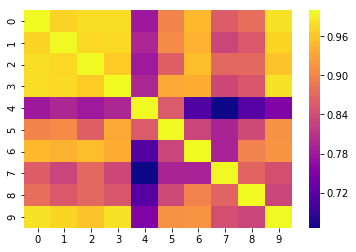

In [4]:
net.heatmap()

## Use the build-graph method to build a graph object from the sim matrix
The build_graph method converts the similarity matrix into a a networkx graph object with becomes an attribute of the Network object. 

In [5]:
node_names = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J'}
net.build_graph("demo_network", node_names=node_names)
net.stats["weights"]

array([0.97078072, 0.97797061, 0.97829737, 0.77808352, 0.89989257,
       0.95010796, 0.85812023, 0.87707153, 0.98288647, 0.97446088,
       0.97546392, 0.79429095, 0.90619662, 0.94207136, 0.83071829,
       0.85299628, 0.97201039, 0.96278831, 0.78029246, 0.86093744,
       0.95307133, 0.87067214, 0.87061304, 0.95755088, 0.79456212,
       0.93450955, 0.93898019, 0.83344799, 0.85237398, 0.98233125,
       0.85530782, 0.71173922, 0.66581257, 0.71552468, 0.75230382,
       0.83074163, 0.79230631, 0.83638833, 0.91338184, 0.78994915,
       0.89769242, 0.91602458, 0.86573385, 0.84228251, 0.83148667])

## Draw and save the graph with edges colored by similarity using the quickdraw method

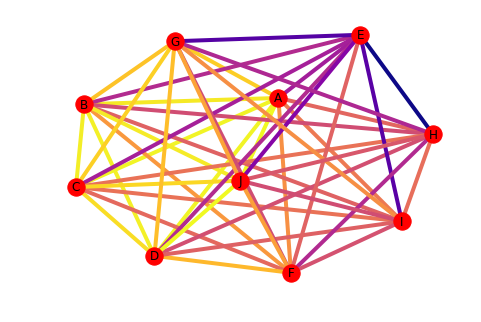

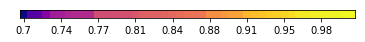

In [6]:
Visuals.quickdraw(graph=net.graph, weights=net.stats["weights"], save=True)

## Export the graph object and edge lists as a files using export_graph

In [7]:
export_graph(net.graph)

## Calculate some quick network stats using the quickstats method.
The quickstats method calculates zscores, mad, robust outlier metric of network edge weights. It also calculates eigenvalues and eigenvectors of the similarity matrix and stores all of these values in the "stats" dictionary attribute of the Network object. 

In [8]:
net.quickstats()
net.stats['robust']

array([1.40176377e+00, 1.50238035e+00, 1.50695306e+00, 1.29487415e+00,
       4.09742775e-01, 1.11246552e+00, 1.74826587e-01, 9.03811188e-02,
       1.57117366e+00, 1.45326449e+00, 1.46730120e+00, 1.06806452e+00,
       4.97962683e-01, 1.00000000e+00, 5.58294091e-01, 2.46531989e-01,
       1.41897200e+00, 1.28991662e+00, 1.26396177e+00, 1.35402034e-01,
       1.15393548e+00, 8.27022431e-04, 0.00000000e+00, 1.21662307e+00,
       1.06426973e+00, 8.94178738e-01, 9.56741596e-01, 5.20094160e-01,
       2.55240602e-01, 1.56340386e+00, 2.14183928e-01, 2.22330766e+00,
       2.86601310e+00, 2.17033334e+00, 1.65563961e+00, 5.57967478e-01,
       1.09583789e+00, 4.78946590e-01, 5.98513902e-01, 1.12882437e+00,
       3.78953517e-01, 6.35496900e-01, 6.82803185e-02, 3.96462363e-01,
       5.47541267e-01])

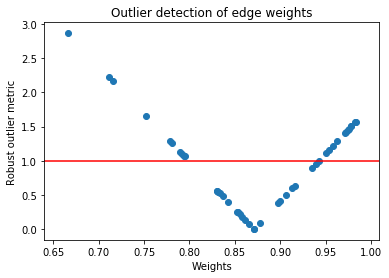

In [9]:
Visuals.outlier_plot(net)

## Use the reweight_graph method to generate a copy of the graph reweighted by roubust outlier score and set threshold to generate an trimmed graph
The example below sets a robust score threshold and culls edges that aren't outside the threshold bounds.  

In [10]:
net.reweight_graph(key="robust", threshold = 1.3)

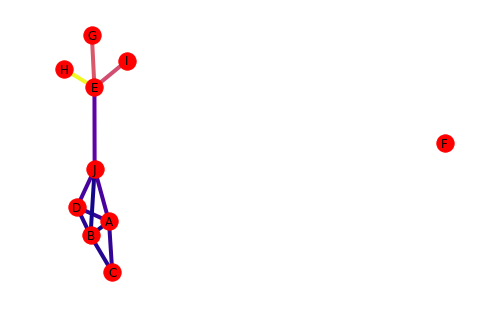

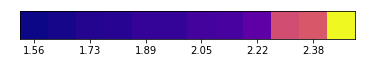

In [11]:
Visuals.quickdraw(graph=net.trim_graph, weights=net.stats['trim_weights'], save=True)

## Export the reweighted graph object and as edge list using export_graph

In [12]:
export_graph(net.trim_graph)